In [1]:
from dgp import dgp
from kernel_class import kernel, combine
from synthetic import path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
X=np.genfromtxt('../../neptune/input.txt')
Y=np.genfromtxt('../../neptune/output.txt').reshape(-1,1)
z=np.genfromtxt('../../neptune/test_in.txt')
Yz=np.genfromtxt('../../neptune/test_out.txt')

In [3]:
X=np.genfromtxt('./input.txt')
Y=np.genfromtxt('./output.txt').reshape(-1,1)
z=np.genfromtxt('./test_in.txt')
Yz=np.genfromtxt('./test_out.txt')

In [47]:
ker1=kernel(length=np.array([1,1,1,1,1]),scale=1,nugget=1e-6,name='sexp',zero_mean=1)
ker2=kernel(length=np.array([1]),scale=1,nugget=1e-6,name='sexp',zero_mean=1)
ker3=kernel(length=np.array([1]),scale=1,nugget=1e-6,name='sexp',zero_mean=1,scale_est=1)
ker_all=combine(ker1,ker2,ker3)
m=dgp(X,Y,ker_all)

In [5]:
%load_ext line_profiler

In [30]:
def my_func():
    re=m.train(N=200,sub_burn=20,method='L-BFGS-B')
%lprun -f dgp.train my_func()

Timer unit: 1e-06 s

Total time: 49.64 s
File: /Users/deyu/Documents/GitHub/DGP/dgp.py
Function: train at line 28

Line #      Hits         Time  Per Hit   % Time  Line Contents
    28                                               def train(self, N=400, burnin=300, sub_burn=20, method='L-BFGS-B',latent_ini='sigmoid'):
    29                                                   #sub_burn>=1
    30                                                   #initialisation
    31         1          3.0      3.0      0.0          self.burnin=burnin
    32         1      50288.0  50288.0      0.1          pgb=trange(1,N+1,ncols='70%')
    33       201     569823.0   2834.9      1.1          for i in pgb:
    34                                                       #S-step
    35       200     100131.0    500.7      0.2              all_kernel_old=copy.deepcopy(self.all_kernel)
    36       200        553.0      2.8      0.0              if not self.lastmcmc:      
    37         1         10.0     10.0

In [48]:
m.train(N=400,sub_burn=20,method='L-BFGS-B')

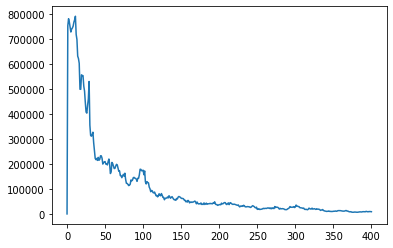

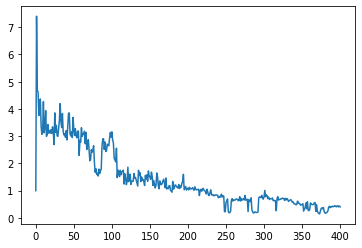

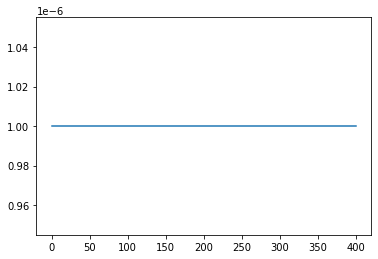

In [49]:
m.plot(2)

In [12]:
m.update_final_kernel(100)

In [50]:
mu,var=m.predict(z, N=100, burnin=0,method='mean_var')

se = 0.050124777954838544


0.09364072888076108

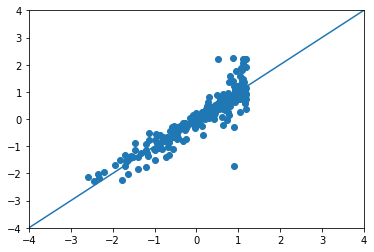

In [51]:
plt.scatter(mu,Yz)
plt.xlim((-4, 4)) 
plt.ylim((-4, 4)) 
plt.plot( [-4,4],[-4,4] )
np.sqrt(np.mean((mu-Yz)**2))/(np.max(Yz)-np.min(Yz))

In [22]:
np.sqrt(np.mean((mu-Yz)**2))

0.038540713503100774

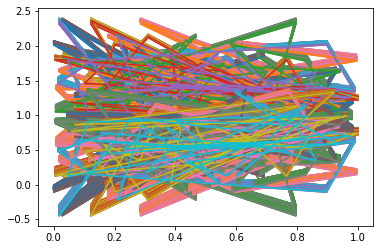

In [11]:
for i in range(len(m.samples[1])):
    plt.plot(m.samples[0][i],m.samples[1][i])

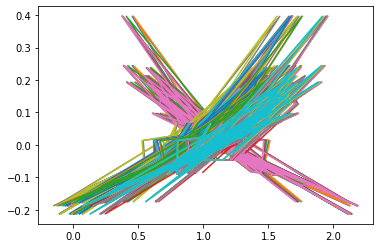

In [176]:
for i in range(len(m.samples[1])):
    plt.plot(m.samples[1][i],m.samples[2][i])

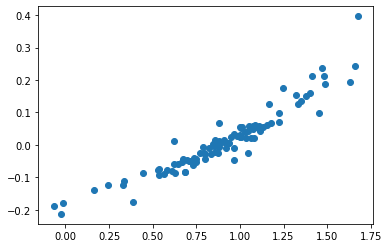

In [177]:
plt.scatter(m.samples[1][10],m.samples[2][10])